In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def create_menger(level, x=0, y=0, z=0, size=1.0, cubes=None):
    """Construye recursivamente la esponja de Menger y guarda los cubos sólidos."""
    if cubes is None:
        cubes = []
    
    if level == 0:
        cubes.append((x, y, z, size))
        return cubes

    new_size = size / 3.0
    for dx in range(3):
        for dy in range(3):
            for dz in range(3):
                # Condición para remover el cubo (el centro de cada cara y el centro completo)
                remove = (dx == 1 and dy == 1) or (dx == 1 and dz == 1) or (dy == 1 and dz == 1)
                if not remove:
                    create_menger(level - 1,
                                  x + dx * new_size,
                                  y + dy * new_size,
                                  z + dz * new_size,
                                  new_size,
                                  cubes)
    return cubes

# Crear la esponja de Menger de nivel 4
level = 4
cubes = create_menger(level)

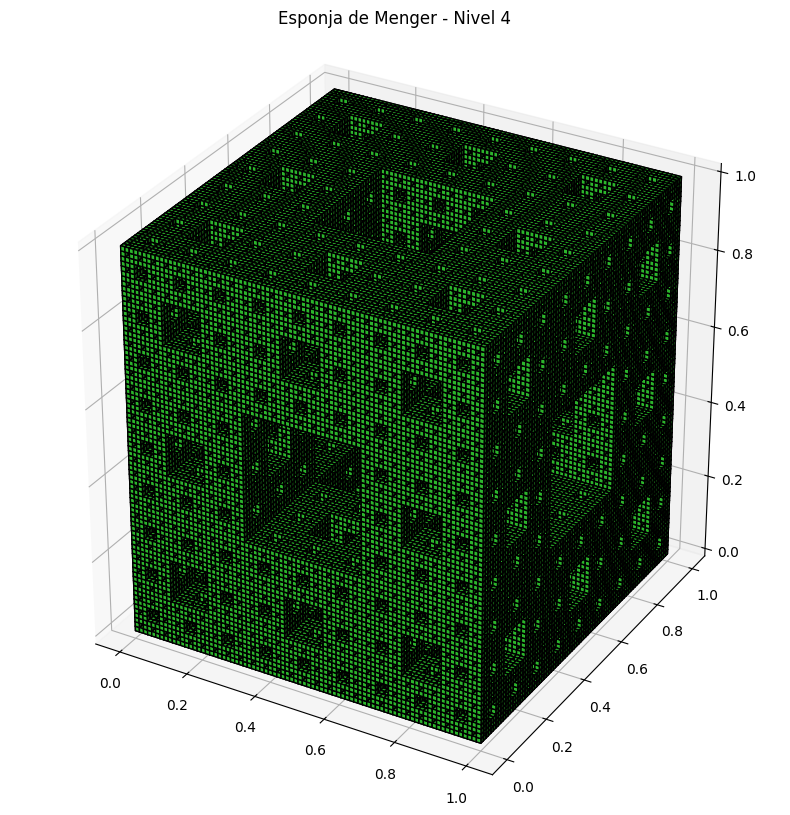

In [6]:
# Visualización en 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for (x, y, z, size) in cubes:
    ax.bar3d(x, y, z, size, size, size, color='limegreen', edgecolor='k')

ax.set_box_aspect([1, 1, 1])
plt.title(f'Esponja de Menger - Nivel {level}')
plt.show()